# Handling with constraints

The library supports the use of optimization problems with arbitrary constraints. 

To explore the use of constraints, We will explore the 2D Six-Hump Camel function with two constraints. First, we will delve into the details of the unconstrained case to then explore the constrained case.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pyBOWIE.core.main import BO
#from pyBOWIE.utils.Plotting import Plot_surrogate

## Unconstrained case

The objective function is 

$ f(x) = (4 -2.1x_1^2 + \frac{x_1^4}{3}) \, x_1^2 + x_1 \, x_2 + (-4 + 4x_2^2) \, x_2^2 $

The problem has two optimal points, given by

$x^{*} = (0.0898, -0.7126)$ and $(-0.0898, 0.7126)$

Being the value of the function

$f(x^*) = -1.0316$

Define the objective function

In [3]:
# Objective function
def six_hump_camel_function(x):

    return (4 - 2.1*x[:,0]**2 + (1/3)*(x[:,0]**4)) * x[:,0]**2 + x[:,0] * x[:,1] + (-4 + 4*x[:,1]**2) * x[:,1]**2

domain = [{'type': 'continuous', 'domain': (-1.5,1.5)},
        {'type': 'continuous', 'domain': (-1.5,1.5)}]

Create a countor plot of the objective function and visualization of optimal points

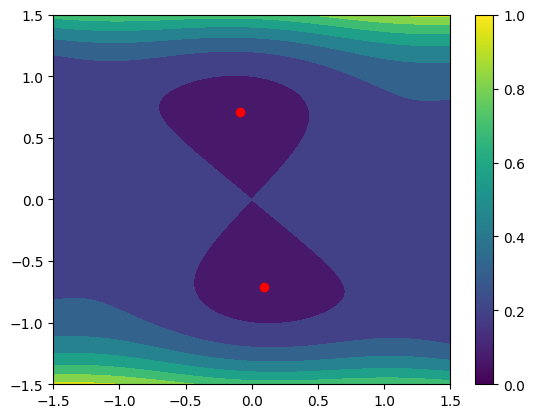

In [4]:
# Countor plot of the unconstrained objective function
n_plot = 500
x_plot = np.array(np.meshgrid(*[np.linspace(-1.5, 1.5, n_plot)]*2)).T.reshape(-1,2)
x1_plot, x2_plot = x_plot[:,0].reshape(n_plot,n_plot), x_plot[:,1].reshape(n_plot,n_plot)
z_plot = six_hump_camel_function(x_plot).reshape(n_plot,n_plot)
x1_opt, x2_opt = [0.0898, -0.0898], [-0.7126, 0.7126]
plt.contourf(x1_plot, x2_plot, z_plot)
plt.scatter(x1_opt, x2_opt, c='r')
plt.colorbar()

Solve the optimization problem

In [5]:
# Uncomment below if you want the code to be executed
#res_un = BO(six_hump_camel_function, domain=domain, sense="minimize", verbose=1).optimize()

In [6]:
#Plot_surrogate(res_un)

## Constrained problem

Now we delve into the constrained problem. Suppose we have the following constraints:

$$
- x_2 - 0.5 + | x_1 | - \sqrt{1 - x_1^2} \leq 0
$$

$$
x_2 + 0.5 - | x_1 | - \sqrt{1 - x_1^2} \leq 0
$$

In [7]:
# Uncomment below if you want the code to be executed
#constraints = [{'name': 'constr_1', 'constraint': '-x[:,1] - 0.5 + np.abs(x[:,0]) - np.sqrt(1-x[:,0]**2) <= 0'},
#              {'name': 'constr_2', 'constraint': 'x[:,1] + 0.5 - np.abs(x[:,0]) - np.sqrt(1-x[:,0]**2) <= 0'}]

Right now, two methods are available to handle constraints:

* Probability of feasibility: "PoF"

* Gaussian Process Clasification: "GPC"

Probability of feasibility

In [8]:
# Uncomment below if you want the code to be executed
#res_PoF = BO(six_hump_camel_function, domain=domain, sense="minimize", constraints=constraints, constraints_method = "PoF", verbose=1).optimize()

In [9]:
#Plot_surrogate(res_PoF)

Gaussian Process Classification

In [10]:
# Uncomment below if you want the code to be executed
#res_GPC = BO(six_hump_camel_function, domain=domain, sense="minimize", surrogate="GP", engine='GPy', constraints=constraints, constraints_method = "GPC", verbose=1).optimize()

In [11]:
#res_GPC = BO(six_hump_camel_function, domain=domain, sense="minimize", surrogate="GP", engine='gpflow', constraints=constraints, constraints_method = "GPC", verbose=1).optimize()
#Plot_surrogate(res_GPC)